In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
import numpy as np
import pandas as pd

matplotlib.rcParams['text.usetex'] = False
plt.style.use('ggplot')

sns.set_style("whitegrid", {'axes.grid' : False})

fs = 10

Import SMA

In [2]:
path = "../" #needs to be changed to find the data
filenames = ["fdr_plot_FMP10_data", "fdr_plot_DHB_data", "fdr_plot_9AA_data"]
matrices = ["FMP10", "DHB", "9AA"]
data = {}
for f, matrix in zip(filenames, matrices):
    fp = path + f + ".csv"
    df = pd.read_csv(fp, index_col=0).T.iloc[:,3:5]
    #print(df)

    for i in list(df.index):
        #print(i)
        if ";" not in str(i):
            df = df.drop(i)

    #display(df)
    data[matrix] = df



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


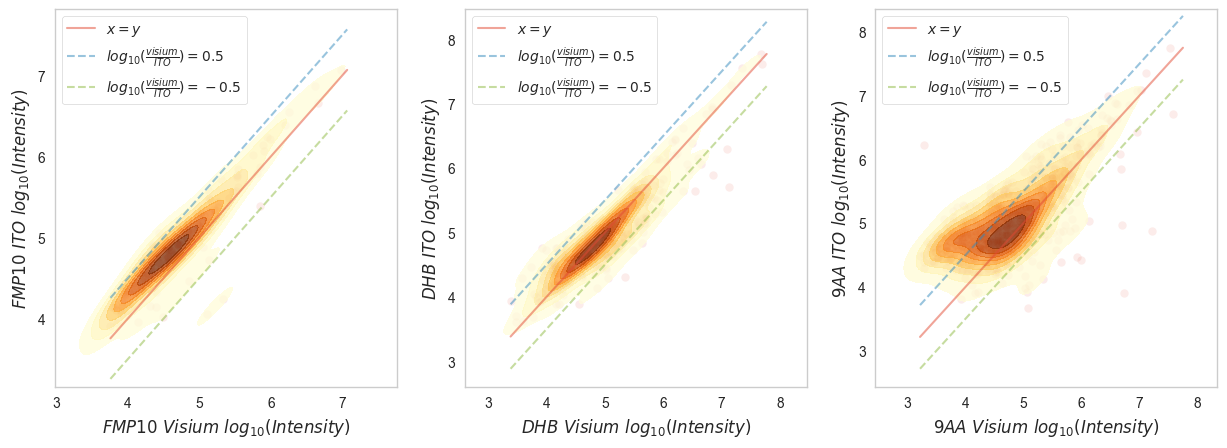

In [3]:
k = 0.5
base = 10

def getlgfold(x,k=0.25):
    return k + x

#plot 8 plots in a 2x4 grid
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=100)
#fig.suptitle(r'$ITO\ log_{2}(Intensity)\ Vs.\ Visium\ log_{2}(Intensity)\ plots$', fontsize=20)

for i, matrix in enumerate(data.keys()):
    intensity_visium = np.log10([float(i) for i in data[matrix].iloc[:,1].values.tolist()])
    intensity_ITO = np.log10([float(i) for i in data[matrix].iloc[:,0].values.tolist()])


    data_df = pd.DataFrame({
       r"$%s\ ITO\ log_{10}(Intensity)$" % matrix: intensity_ITO,
        r"$%s\ Visium\ log_{10}(Intensity)$" % matrix: intensity_visium
    })

    sns.scatterplot(y=r"$%s\ ITO\ log_{10}(Intensity)$" % matrix, x=r"$%s\ Visium\ log_{10}(Intensity)$" % matrix, data=data_df, ax=axs[i], alpha=.1, color='C0')


    #add sns density plot with yellow color
    sns.kdeplot(y=r"$%s\ ITO\ log_{10}(Intensity)$" % matrix, x=r"$%s\ Visium\ log_{10}(Intensity)$" % matrix, data=data_df, ax=axs[i], fill=True, alpha=0.75, cmap="YlOrBr")

    
    #make a lineplot with hue help text
    x = min(min(intensity_visium), min(intensity_ITO))
    y = max(max(intensity_visium), max(intensity_ITO))
    sns.lineplot(x=[x,y], y=[x,y], color='C0', linestyle='-', linewidth=1.5, label=r'$x=y$', ax=axs[i], alpha=0.5)
    #plt.title(matrix)


    sns.lineplot(x=[x,y],y=[getlgfold(x,k), getlgfold(y,k)], color='C1', linestyle='--', linewidth=1.5, label=r'$log_{10}(\frac{visium}{ITO})=%s$' % k, ax=axs[i], alpha=0.5)
    sns.lineplot(x=[x,y], y=[getlgfold(x,-k), getlgfold(y,-k)], color='C5', linestyle='--', linewidth=1.5, label=r'$log_{10}(\frac{visium}{ITO})=-%s$' % k, ax=axs[i], alpha=0.5)
    plt.legend()
    



plt.savefig("scatterplots.pdf")
plt.show()

,Upregulated,Downregulated,No significance
FMP10,1.212121,3.030303,95.757576
DHB,5.913978,2.150538,91.935484
9AA,5.640244,32.774390,61.585366


'\nDownregulated = Visium < ITO glass\nUpregulated = Visium > ITO glass\n'

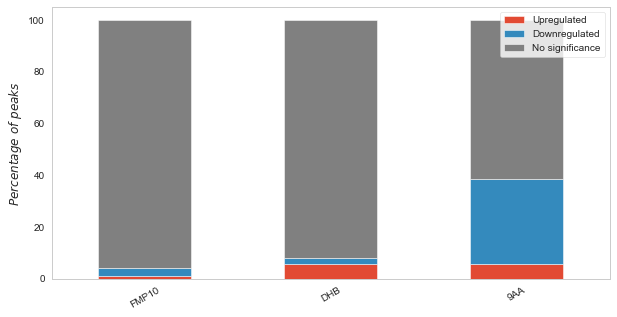

In [4]:
upregulated_list = []
downregulated_list = []
not_significant_list = []
samples_list = []
for i, matrix in enumerate(data.keys()):
    intensity_visium = np.log10([float(i) for i in data[matrix].iloc[:,1].values.tolist()])
    intensity_ITO = np.log10([float(i) for i in data[matrix].iloc[:,0].values.tolist()])

    downregulated = (k + intensity_visium < intensity_ITO).sum()
    downregulated_list.append(downregulated)
    upregulated = (k + intensity_ITO < intensity_visium).sum()
    upregulated_list.append(upregulated)
    not_significant_list.append(len(intensity_ITO) - (upregulated + downregulated))
    samples_list.append(matrix)

df = pd.DataFrame({'Upregulated': upregulated_list,
                   'Downregulated': downregulated_list,
                   'No significance': not_significant_list},
                  index=samples_list)

colors = ['C0', 'C1', '#808080']
df = df.div(df.sum(axis=1)/100, axis=0)

df.plot(kind='bar', stacked=True, color=colors, figsize=(10, 5))
#plt.title(r'$Outlier\ genes\ in\ SMA\ samples$')
plt.ylabel(r'$Percentage\ of\ peaks$')
plt.xticks(rotation=30)
display(df)
plt.savefig("barplots.pdf")

"""
Downregulated = Visium < ITO glass
Upregulated = Visium > ITO glass
"""